# CS3DP3: Differential Privacy
## Homework 2

In [29]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from unittest.mock import patch

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

adult = pd.read_csv('https://raw.githubusercontent.com/ShahabAsoodeh/3DP3/main/adult_with_pii.csv')
adult = adult.dropna()

/var/folders/3w/zzzgqpbs6rbbg69j0lrg432m0000gn/T/ipykernel_12149/2449949129.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [30]:
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Question 2 (a)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the  `len` of the filtered dataframe.

In [31]:
def query1():
    return adult[adult['Marital Status'] == 'Never-married'].shape[0]


query1()

9726

In [32]:
# TEST CASE for question 1
assert query1() == 9726

## Question 2 (b) 

In 2-5 sentences, answer the following:
- What is the sensitivity of `query1`, and why?

1 because it is a counting query.

## Question 2 (c) 

Use the implementation of `laplace_mech` to produce a differentially private answer to `query1`, with `epsilon = 0.1`.

In [33]:
def dp_query1(epsilon): 
    return laplace_mech(query1(), 1, epsilon)

dp_query1(0.1)

9711.013917219563

In [34]:
# TEST CASE for Question 2 (c)
dp_results = [dp_query1(0.1) for _ in range(100)]
spec = [np.random.laplace(loc=9726, scale=1/0.1) for _ in range(100)]
assert stats.wasserstein_distance(dp_results, spec) < 10

## Question 2 (d)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Implement a function `graph_error1` that:

- Calculates 1000 differentially private answers to `dp_query1`
- Calculates the percent error for each one of these answers against the original (non-private) answer
- Graphs the distribution of errors using a histogram

*Hint*: use `plt.hist(..., bins=20)`.

The given code will use your function to plot errors for `epsilon=0.1` and `epsilon=1.0`.

In [37]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

[9716.213980912635, 9718.289826192955, 9746.305238107461, 9719.05116084511, 9725.65132285172, 9725.528743252846, 9755.894407922104, 9717.099632804731, 9722.96669636784, 9734.134554473194, 9725.04450317121, 9705.360767882361, 9682.990540917048, 9736.148745017192, 9725.662463308667, 9728.442475495516, 9728.063631093111, 9719.406927133565, 9736.174205379093, 9689.306289917733, 9733.315952719395, 9725.523225324827, 9677.390492442591, 9709.907925305033, 9717.107350105065, 9721.3941967946, 9728.494396435812, 9703.624023425205, 9732.903896560087, 9741.517270898818, 9756.930599735599, 9718.214807518074, 9767.827811604679, 9731.356363008654, 9735.97347380524, 9735.513603409292, 9731.25778440254, 9719.152622087026, 9715.332819260026, 9724.586312338859, 9722.022434192622, 9731.808871410462, 9722.980167676662, 9726.616436269678, 9722.740273694146, 9726.195268744596, 9720.923606444443, 9728.843814059168, 9717.934850050673, 9720.894534550636, 9714.247676598305, 9719.107252097807, 9722.016535904742, 

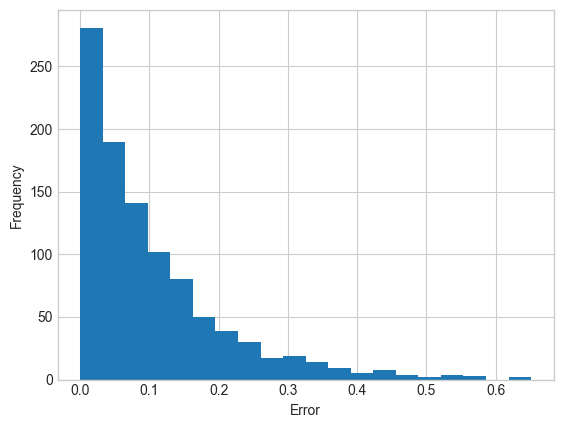

[9725.875747901298, 9726.248464014816, 9726.094401273158, 9722.617976697255, 9725.769101961176, 9726.408420682674, 9725.89808089422, 9726.169689744367, 9725.909371875492, 9724.089848005977, 9728.166928326384, 9725.386341281657, 9726.766286839464, 9724.37135618892, 9726.120054861154, 9726.642693480684, 9727.867091648752, 9729.176807802685, 9725.713222116297, 9729.951024941018, 9724.122603480966, 9725.82719139896, 9725.184490384747, 9724.946634765145, 9726.30590596617, 9723.925110811422, 9725.73548508376, 9724.617584267182, 9724.682062270987, 9727.211832220535, 9725.832913522483, 9726.825282258716, 9724.341909116209, 9726.45998576893, 9725.707382700972, 9725.499223906729, 9727.36582389741, 9723.88336943807, 9728.97523699719, 9726.107358712297, 9726.9742384091, 9726.407496175349, 9726.089796360198, 9724.923618765575, 9725.784720990257, 9726.260543101314, 9726.085390583043, 9725.826607650351, 9727.28058318203, 9728.397862793909, 9724.27089093577, 9725.908890209152, 9725.281532646959, 9724.

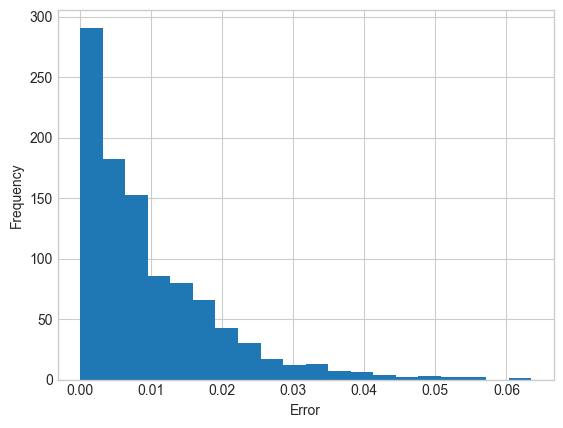

In [38]:
def graph_error1(epsilon):

    orig = query1()
    privs = [dp_query1(epsilon) for _ in range(1000)]
    print(privs)
    errors = [pct_error(orig, priv) for priv in privs]

    plt.hist(errors, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()
graph_error1(0.1)
graph_error1(1.0)

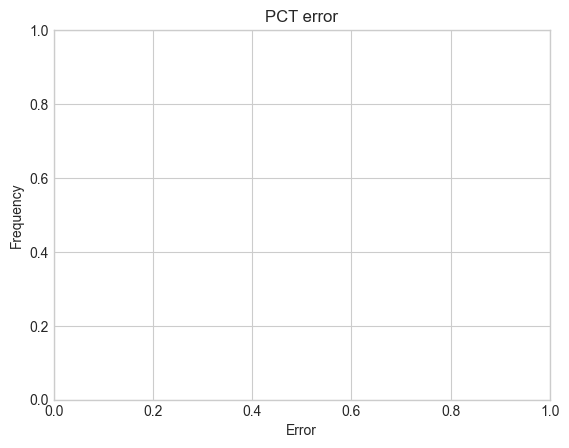

In [23]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query1()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error1(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.001

## Question 2 (e)

In 2-5 sentences, answer the following:

- How does the histogram of relative errors for $\epsilon = 0.1$ differ from the one for $\epsilon = 1.0$?
- What do the two histograms tell you about the effect of $\epsilon$ on relative error?

Answers:
- The errors are bigger for smaller $\epsilon$ ($\epsilon$ = 0.1), and relatively more spread out than bigger $\epsilon$, due to bigger values noises.
- higher values of $\epsilon$ indicate smaller relative errors and better accuracy and vice versa. However, the improvement in relative error and accuracy comes at the cost of privacy guarentees.

## Question 2 (f)

Consider `query2`, which asks how many people in the dataset are over the age of 60.

In [45]:
def query2():
    return len(adult[adult['Age'] > 60])


1806

Implement `dp_query2`, a differentially private version of `query2` (as in Question 2 (c)), and `graph_error2`, which graphs relative error for `dp_query2` (as in question 4).

[1806.6188820421314, 1806.3051104696365, 1805.8240348603836, 1803.8097522328196, 1805.9844439267702, 1809.1531042899692, 1805.6138218788915, 1805.608194546807, 1806.9145830494015, 1806.0571076891772, 1806.2095382214432, 1805.1147802084106, 1806.3164159425426, 1806.9054674912552, 1805.2746306738939, 1806.7238240378888, 1805.6942878794844, 1807.368240157569, 1803.4974362978921, 1806.3692663145864, 1803.8849626420458, 1810.40856236079, 1805.5427625954026, 1805.9230866898624, 1804.4142695476485, 1806.0421522597028, 1805.9238523277102, 1806.8673357627733, 1805.3450882941381, 1805.5956154777987, 1804.18636391823, 1806.3661502354414, 1805.8967620248966, 1806.6167410149267, 1806.0147859203414, 1806.1875548928358, 1806.0800724354424, 1805.9187874440843, 1808.0352149147639, 1804.8033668958979, 1806.2471248427419, 1808.3656736903001, 1805.27732256041, 1807.3064205808341, 1803.9715398258807, 1805.7615701223165, 1808.176968013913, 1804.2582833823903, 1806.179177401751, 1805.4823822326543, 1806.5844

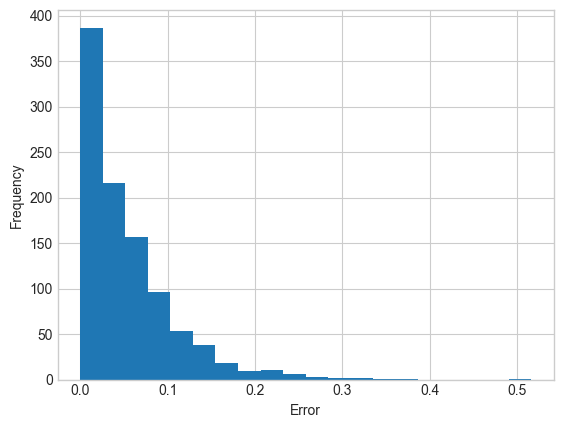

[9727.784429407764, 9726.101178408075, 9727.15750924102, 9725.719429730532, 9720.394929735054, 9726.279677706787, 9725.985874441829, 9726.111100788687, 9727.473084525509, 9727.558333855923, 9723.235404733663, 9724.82951236504, 9729.029415639665, 9725.534107027352, 9724.585410713798, 9726.341205072777, 9725.954032404992, 9726.014255702963, 9728.659539120124, 9726.493654739857, 9725.024159795652, 9725.921427029223, 9725.065902029173, 9723.29785700326, 9727.626589538824, 9725.517846668645, 9726.840593247656, 9728.3838235989, 9727.544830541072, 9726.305574397038, 9725.705798229817, 9724.975533616469, 9725.317748264162, 9726.873608613754, 9726.641354652817, 9725.89901860163, 9727.512940405884, 9724.337130443384, 9728.294469459091, 9726.097551720786, 9723.26112462171, 9725.579434957373, 9725.25320262158, 9728.119536104654, 9725.111989388719, 9726.160498200368, 9726.994852104111, 9725.31252105334, 9725.843987374757, 9726.64862133791, 9727.469850029034, 9725.440377791856, 9725.912729681777, 97

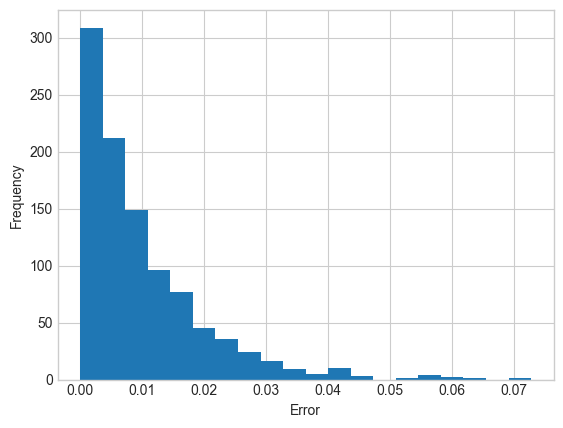

In [43]:
def dp_query2(epsilon):
    return laplace_mech(query2(), 1, epsilon)

def graph_error2(epsilon):
    orig = query2()
    privs = [dp_query2(epsilon) for _ in range(1000)]
    print(privs)
    errors = [pct_error(orig, priv) for priv in privs]

    plt.hist(errors, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

graph_error2(1.0)
graph_error1(1.0) # we plot both errors for query 1 and query 2 at the same epsilon, to compare

[1805.519915213716, 1806.2432713286619, 1805.733451731248, 1805.7704561680935, 1806.6219800528768, 1806.807142379413, 1806.4415943240979, 1801.8606822762722, 1807.4926764873717, 1805.7652485511119, 1803.4058304799426, 1805.749179831661, 1807.0755067494774, 1804.4166582973874, 1805.0525439669536, 1805.7868721340485, 1807.1371199358084, 1806.1053805080355, 1804.0129669656167, 1805.8686535520128, 1807.609176062109, 1804.9694123241156, 1807.7632694926526, 1806.1196714599669, 1805.6417303645821, 1806.7592388439077, 1805.901396228021, 1805.5261795511428, 1805.6238803945712, 1808.3374270735935, 1804.6883915944363, 1806.3110346085339, 1807.0270355330517, 1805.6753281816164, 1806.7193851422035, 1804.842578908151, 1805.9927425792293, 1806.1499464586816, 1805.9599156830752, 1806.0424459292665, 1804.5505721514937, 1806.645504174639, 1806.1825480944328, 1806.0487215288388, 1805.7658911732526, 1804.2663864201875, 1805.7102187176927, 1806.237463295626, 1806.6496889660184, 1803.5664279331056, 1805.040

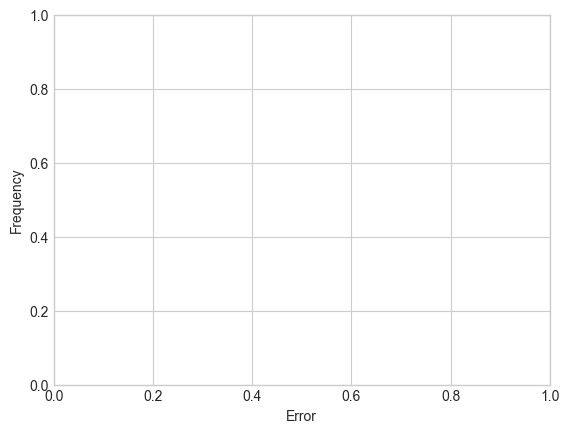

In [44]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query2()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error2(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.01

## Question 2 (g) 

In 2-5 sentences, answer the following:

- Given the graph from question 6, how does relative error differ between `dp_query1` and `dp_query2` for the same value of $\epsilon$?
- What property of the query causes the difference in relative errors between `dp_query1` and `dp_query2`?

 Answer:
 dp_query2 has larger relative errors compared to dp_query1. The sensitivity of the queries and the implementation of the laplace mechanisms cause the difference; since the two queries have the same sensitivity but vary in sizes of their results, the query with smaller original result will have bigger relative errors.